# Correlation and Covariance


 __Covariance__ indicates the direction of the linear relationship between variables. 
 
 __Correlation__ on the other hand measures both the strength and direction of the linear relationship between two variables. Correlation is a function of the covariance. 
 
What sets them apart is the fact that correlation values are standardized whereas, covariance values are not. You can obtain the correlation coefficient of two variables by dividing the covariance of these variables by the product of the standard deviations of the same values. 

## Covariance Cov

### [Numerical definition of  Cov(X,Y)](https://online.stat.psu.edu/stat414/node/109/)

Reference: 
1. [covariance_correlation](https://www.probabilitycourse.com/chapter5/5_3_1_covariance_correlation.php)
2. [expectation-and-variance](https://revisionmaths.com/advanced-level-maths-revision/statistics/expectation-and-variance)

The covariance of two variables (X and Y) can be represented as Cov(X,Y) or $\sigma_{XY}$.

![](Images/2.cov_and_corr/1.PNG)

If we look at a single variable, say Y, cov(Y,Y), the expression can be written in the following way:

![](Images/2.cov_and_corr/2.PNG)

Now as we see, in the image above, $S^2$ or sample variance is basically the covariance of a variable with itself. This term can also be defined in the following manner:

The use of the mean in the calculation suggests the need for each data sample to have a Gaussian or Gaussian-like distribution.

![](Images/2.cov_and_corr/prop.PNG)


The sign of the covariance can be interpreted as whether the two variables change in the same direction (positive) or change in different directions (negative). The magnitude of the covariance is not easily interpreted. A covariance value of zero indicates that both variables are completely independent.

![](Images/2.cov_and_corr/3.PNG)

***

## Correlation

### Numerical definition of correlation

The correlation coefficient is also known as the Pearson product-moment correlation coefficient, or Pearson’s correlation coefficient. As mentioned earlier, it is obtained by dividing the covariance of the two variables by the product of their standard deviations. The mathematical representation of the same can be shown in the following manner:

IMG 4

The values of the correlation coefficient can range from -1 to +1. The closer it is to +1 or -1, the more closely are the two variables are related. The positive sign signifies the direction of the correlation i.e. if one of the variables increases, the other variable is also supposed to increase.


Correlation can also be neural or zero, meaning that the variables are unrelated.
- __Positive Correlation:__ both variables change in the same direction.
- __Neutral Correlation:__ No relationship in the change of the variables.
- __Negative Correlation:__ variables change in opposite directions.

Absolute value of correlation coefficient denotes the strength of the relationship.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

## Creating a Dataset 

In [2]:
np.random.seed(1) # seed random number generator
# prepare data
data1 = 20 * np.random.randn(1000) + 100
data2 = data1 + (10 * np.random.randn(1000) + 50)

In [3]:
# summarize
print('data1: mean=%.3f stdv=%.3f' % (np.mean(data1), np.std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (np.mean(data2), np.std(data2)))

data1: mean=100.776 stdv=19.620
data2: mean=151.050 stdv=22.358


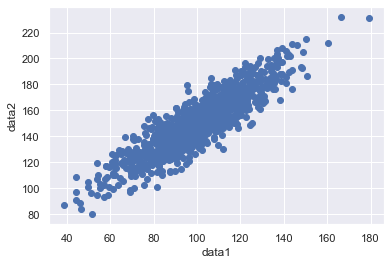

In [4]:
plt.scatter(data1, data2);
plt.xlabel('data1');
plt.ylabel('data2');

### Calculating covariance between two variables X and Y
The cov() NumPy function can be used to calculate a covariance matrix between two or more variables.



In [5]:
covariance = np.cov(data1, data2)
print("Covariance between data1 and data2: ")
print(covariance)

Covariance between data1 and data2: 
[[385.33297729 389.7545618 ]
 [389.7545618  500.38006058]]


Because the dataset was contrived with each variable drawn from a Gaussian distribution and the variables linearly correlated, covariance is a reasonable method for describing the relationship.

The covariance between the two variables is 389.75. We can see that it is positive, suggesting the variables change in the same direction as we expect.

The covariance and covariance matrix are used widely within statistics and multivariate analysis to characterize the relationships between two or more variables.

A problem with covariance as a statistical tool alone is that it is challenging to interpret. This leads us to the Pearson’s correlation coefficient next.

## Pearson’s Correlation $\rho$

> The Pearson correlation coefficient (named for Karl Pearson) can be used to summarize the strength of the linear relationship between two data samples.

The Pearson’s correlation coefficient is calculated as the covariance of the two variables divided by the product of the standard deviation of each data sample. It is the normalization of the covariance between the two variables to give an interpretable score.

$$ \rho = \frac{covariance(X)(Y)}{(std(X)*std(Y))} $$

The use of mean and standard deviation in the calculation suggests the need for the two data samples to have a Gaussian or Gaussian-like distribution.

The coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative correlation to a full positive correlation. A value of 0 means no correlation. The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.

> The [pearsonr() SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) function can be used to calculate the Pearson’s correlation coefficient between two data samples with the same length.

In [6]:
from scipy.stats import pearsonr

In [7]:
corr,_ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.888


The Pearson’s correlation coefficient can be used to evaluate the relationship between more than two variables.

This can be done by calculating a matrix of the relationships between each pair of variables in the dataset. The result is a symmetric matrix called a correlation matrix with a value of 1.0 along the diagonal as each column always perfectly correlates with itself.

***

### Spearman’s Correlation
Can be used in those cases where the data need not have a gaussian distribution.

Two variables may be related by a nonlinear relationship, such that the relationship is stronger or weaker across the distribution of the variables. Further, the two variables being considered may have a non-Gaussian distribution.

In this case, the Spearman’s correlation coefficient can be used to summarize the strength between the two data samples. This test of relationship can also be used if there is a linear relationship between the variables, but will have slightly less power (e.g. may result in lower coefficient scores).

Instead of calculating the coefficient using covariance and standard deviations on the samples themselves, these statistics are calculated from the relative rank of values on each sample. __This is a common approach used in non-parametric statistics, e.g. statistical methods where we do not assume a distribution of the data such as Gaussian.__

                
 Spearmans correlation $$ = \frac{covariance(rank(X), rank(Y))}{std(X)*std(Y)} $$
 
 A linear relationship between the variables is not assumed, although a monotonic relationship is assumed. 
 
 __This is a mathematical name for an increasing or decreasing relationship between the two variables.__
 
> If you are unsure of the distribution and possible relationships between two variables, Spearman correlation coefficient is a good tool to use.

The [spearmanr() SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html) function can be used to calculate the Spearman’s correlation coefficient between two data samples with the same length.



In [8]:
from scipy.stats import spearmanr
# calculate spearman's correlation
corr, _ = spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.872


We know that the data is Gaussian and that the relationship between the variables is linear. Nevertheless, the nonparametric rank-based approach shows a strong correlation between the variables of 0.8.

In [9]:
data3 = np.random.randint(1,1000,500)
data4 = data3**2 + data3
corr, _ = spearmanr(data3, data4)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 1.000


## To find correlation between categorical and continuous variables

Reference: 

1. [Using Python to Find Correlation Between Categorical and Continuous Variables](https://dzone.com/articles/correlation-between-categorical-and-continuous-var-1) 

### Case 1: When an Independent nominal categorical Variable Only Has Two Values

#### [Point Biserial Correlation](https://www.statisticssolutions.com/point-biserial-correlation/)
The Point-Biserial Correlation Coefficient is a correlation measure of the strength of association between a continuous-level variable (ratio or interval data) and a binary variable.  Binary variables are variables of nominal scale with only two values.  They are also called dichotomous variables or dummy variables in Regression Analysis.

[SciPy has a point biserial correlation function called pointbiserialr](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pointbiserialr.html): The point biserial correlation is used to measure the relationship between a binary variable, x, and a continuous variable, y. 

Also,  
If a categorical variable only has two values (i.e. true/false), then we can convert it into a numeric datatype (0 and 1). Since it becomes a numeric variable, we can find out the correlation using the `dataframe.corr()` function or `np.corrcoef(binary_vector, continuous_vetor)`.

Let's create a dataframe which will consist of two columns: __Employee Type (EmpType)__ and __Salary__.

Purposely, we will assign more salary to EmpType1. This way we will get some correlation between __EmpType__ and __Salary__.

Create a dataframe with the following properties:
- Mean (average) salary of __EmpType1__ is 60 with a standard deviation of five.
- Mean (average) salary of __EmpType2__ is 50 with a standard deviation of five.

In [26]:
num1 = data1
df1 = pd.DataFrame(num1, columns = ['Points'])
df1['Type'] = 'EmpType1'

num2 = data2
df2 = pd.DataFrame(num1, columns = ['Points'])
df2['Type'] = 'EmpType2'

df=pd.concat([df1,df2],axis=0)

In [27]:
df.shape

(2000, 2)

Since Categorical variable 'Type' has only 2 values we will convert it into numeric (0 and 1) datatype.


In [28]:
df['TypeInt'] = (df['Type']=='EmpType1').astype('int')
df.head()

,Points,Type,TypeInt
0,132.486907,EmpType1,1
1,87.764872,EmpType1,1
2,89.436565,EmpType1,1
3,78.540628,EmpType1,1
4,117.308153,EmpType1,1


In [29]:
df['TypeInt'].unique()

array([1, 0])

In [30]:
df.corr()

,Points,TypeInt
Points,1.000000e+00,5.432261e-19
TypeInt,5.432261e-19,1.000000e+00


In [32]:
from scipy.stats import pointbiserialr
pointbiserialr(df['TypeInt'], df['Points'])

PointbiserialrResult(correlation=1.0408340855860843e-17, pvalue=0.9999999999955483)

In [34]:
np.corrcoef(df['TypeInt'], df['Points'])

array([[ 1.00000000e+00, -5.79441176e-18],
       [-5.79441176e-18,  1.00000000e+00]])

Another example

In [35]:
temp = pd.DataFrame()
temp['a'] = [0,0,0,1,1,1,1]
temp['b'] = np.arange(7)
temp

,a,b
0,0,0
1,0,1
2,0,2
3,1,3
4,1,4
5,1,5
6,1,6


In [39]:
temp.corr()

,a,b
a,1.000000,0.866025
b,0.866025,1.000000


In [40]:
pointbiserialr(temp['a'], temp['b'])

PointbiserialrResult(correlation=0.8660254037844386, pvalue=0.011724811003954649)

In [41]:
np.corrcoef(temp['a'], temp['b'])

array([[1.       , 0.8660254],
       [0.8660254, 1.       ]])

The correlation between a and b is 0.866. So we can determine it is correlated. 

***
### Case 2: When Independent nominal categorical Variables Have More Than Two Values

Use ANOVA

In [49]:
df1 = pd.DataFrame()
df1['goals'] = np.random.randint(0,6,100)
df1['player'] = ['Messi' for i in range(len(df1['goals']))]
df1.head()

,goals,player
0,2,Messi
1,4,Messi
2,2,Messi
3,0,Messi
4,4,Messi


In [50]:
df2 = pd.DataFrame()
df2['goals'] = np.random.randint(0,5,100)
df2['player'] = ['Ronaldo' for i in range(len(df2['goals']))]
df3 = pd.DataFrame()
df3['goals'] = np.random.randint(0,3,100)
df3['player'] = ['Neymar' for i in range(len(df3['goals']))]
football = pd.concat([df1,df2,df3])
del(df1,df2,df3)
football.head()

,goals,player
0,2,Messi
1,4,Messi
2,2,Messi
3,0,Messi
4,4,Messi


Method 1: 

In [51]:
from scipy.stats import f_oneway
result_anova = f_oneway(football.loc[football.player=='Messi', 'goals'],
                       football.loc[football.player=='Ronaldo', 'goals'],
                       football.loc[football.player=='Neymar', 'goals'])
result_anova

F_onewayResult(statistic=34.56416588756199, pvalue=3.19729132540096e-14)

As p-value is less than 0.05 so we can reject the null hypothesis.

[The Search for Categorical Correlation](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9)



***

![](Images/2.cov_and_corr/4.PNG)

## 2. To find correlation between categorical and categorical variables

What we need is something that will look like correlation, but will work with categorical values — or more formally, we’re looking for a measure of association between two categorical features. Introducing: __Cramér’s V__. It is based on a nominal variation of Pearson’s Chi-Square Test, and comes built-in with some great benefits:
1. The output is in the range of [0,1], where 0 means no association and 1 is full association. (Unlike correlation, there are no negative values, as there’s no such thing as a negative association. Either there is, or there isn’t).
2. Like correlation, Cramer’s V is symmetrical — it is insensitive to swapping x and y.

### Crammer's V implementation in Python

Obtained the function from [this blogpost](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9). (The function calculates Cramers V statistic for categorial-categorial association. Uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328)

```
def cramers_v(x, y):  
    confusion_matrix = pd.crosstab(x,y)  
    chi2 = ss.chi2_contingency(confusion_matrix)[0]  
    n = confusion_matrix.sum().sum()  
    phi2 = chi2/n  
    r,k = confusion_matrix.shape  
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))  
    rcorr = r-((r-1)**2)/(n-1)  
    kcorr = k-((k-1)**2)/(n-1)  
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))  
```


![](Images/2.cov_and_corr/5.PNG)

Reference:
1. [How to Calculate Correlation Between Variables in Python?](https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/)
2. [Baffled by Covariance and Correlation??? Get the Math and the Application in Analytics for both the terms..](https://towardsdatascience.com/let-us-understand-the-correlation-matrix-and-covariance-matrix-d42e6b643c22)
3. [Covariance Vs Correlation](https://www.linkedin.com/pulse/covariance-vs-correlation-kumar-p)
4. [What is the difference between correlation and covariance?](https://www.edureka.co/community/11518/what-is-the-difference-between-correlation-and-covariance)